In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA as ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
pd.options.display.float_format = '{:.2f}'.format

In [4]:
# Load the data
df_CG010 = pd.read_csv('C:/Users/patir/project_jupyter/CG010.csv')

In [5]:
# Checking the over all information on the dataset
df_CG010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From Date        3872 non-null   object 
 1   To Date          3872 non-null   object 
 2   PM2.5 (ug/m3)    2119 non-null   float64
 3   PM10 (ug/m3)     2130 non-null   float64
 4   NO (ug/m3)       2137 non-null   float64
 5   NO2 (ug/m3)      1764 non-null   float64
 6   NOx (ppb)        2136 non-null   float64
 7   NH3 (ug/m3)      2136 non-null   float64
 8   SO2 (ug/m3)      2186 non-null   float64
 9   CO (mg/m3)       2090 non-null   float64
 10  Ozone (ug/m3)    2217 non-null   float64
 11  Benzene (ug/m3)  2142 non-null   float64
 12  RH (%)           2209 non-null   float64
 13  WS (m/s)         2217 non-null   float64
 14  WD (degree)      2218 non-null   float64
 15  SR (W/mt2)       2218 non-null   float64
 16  RF (mm)          2217 non-null   float64
 17  AT (degree C) 

In [6]:
df_CG010.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),RH (%),WS (m/s),WD (degree),SR (W/mt2),RF (mm),AT (degree C)
0,2022-10-21 16:00:00,2022-10-21 17:00:00,NaN,NaN,3.90,41.23,NaN,NaN,25.41,1.01,8.58,2.99,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-21 17:00:00,2022-10-21 18:00:00,88.75,109.48,4.34,44.66,32.39,23.61,23.04,1.06,7.52,3.62,57.27,3.53,99.42,24.95,0.00,27.82
2,2022-10-21 18:00:00,2022-10-21 19:00:00,85.20,125.13,19.61,70.78,60.73,27.90,32.95,1.62,4.20,3.17,59.14,3.82,109.98,21.10,0.00,26.48
3,2022-10-21 19:00:00,2022-10-21 20:00:00,83.77,223.75,37.16,74.18,77.44,32.47,35.61,1.88,3.32,3.29,59.34,4.36,111.03,20.93,0.00,25.89
4,2022-10-21 20:00:00,2022-10-21 21:00:00,93.79,300.12,37.17,62.70,63.44,31.46,18.53,1.84,3.18,4.06,60.91,5.37,119.34,20.77,0.00,26.00


In [7]:
df_CG010.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5 (ug/m3),2119.00,40.26,23.09,4.00,23.89,34.77,52.46,221.87
PM10 (ug/m3),2130.00,93.31,52.52,6.38,53.40,81.16,122.81,626.88
NO (ug/m3),2137.00,25.54,32.70,0.25,5.34,12.30,33.51,241.22
NO2 (ug/m3),1764.00,47.36,25.42,0.03,24.49,54.14,70.52,79.97
NOx (ppb),2136.00,47.33,32.88,7.09,24.32,38.72,59.32,239.55
NH3 (ug/m3),2136.00,57.87,26.65,15.49,39.61,61.03,73.33,172.44
SO2 (ug/m3),2186.00,11.15,7.27,0.48,7.70,9.32,12.32,77.82
CO (mg/m3),2090.00,1.24,0.54,0.20,0.84,1.13,1.52,4.31
Ozone (ug/m3),2217.00,8.55,15.03,2.08,2.56,3.71,6.35,155.37
Benzene (ug/m3),2142.00,2.20,0.78,0.00,1.84,2.25,2.63,5.22


In [8]:
# There are a lot of missing values present in the dataset
df_CG010.isnull().sum()

From Date             0
To Date               0
PM2.5 (ug/m3)      1753
PM10 (ug/m3)       1742
NO (ug/m3)         1735
NO2 (ug/m3)        2108
NOx (ppb)          1736
NH3 (ug/m3)        1736
SO2 (ug/m3)        1686
CO (mg/m3)         1782
Ozone (ug/m3)      1655
Benzene (ug/m3)    1730
RH (%)             1663
WS (m/s)           1655
WD (degree)        1654
SR (W/mt2)         1654
RF (mm)            1655
AT (degree C)      1654
dtype: int64

In [9]:
# Make the 'From Date' column the index as datetime
def create_dt_index(dataframe):
    dataframe = dataframe.drop(columns='To Date')
    dataframe['From Date'] = pd.to_datetime(dataframe['From Date'])
    dataframe = dataframe.rename(columns={'From Date': 'datetime'})
    return dataframe.set_index('datetime')

In [10]:
df = create_dt_index(df_CG010)
df.head()

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),RH (%),WS (m/s),WD (degree),SR (W/mt2),RF (mm),AT (degree C)
datetime,,,,,,,,,,,,,,,,
2022-10-21 16:00:00,NaN,NaN,3.90,41.23,NaN,NaN,25.41,1.01,8.58,2.99,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-21 17:00:00,88.75,109.48,4.34,44.66,32.39,23.61,23.04,1.06,7.52,3.62,57.27,3.53,99.42,24.95,0.00,27.82
2022-10-21 18:00:00,85.20,125.13,19.61,70.78,60.73,27.90,32.95,1.62,4.20,3.17,59.14,3.82,109.98,21.10,0.00,26.48
2022-10-21 19:00:00,83.77,223.75,37.16,74.18,77.44,32.47,35.61,1.88,3.32,3.29,59.34,4.36,111.03,20.93,0.00,25.89
2022-10-21 20:00:00,93.79,300.12,37.17,62.70,63.44,31.46,18.53,1.84,3.18,4.06,60.91,5.37,119.34,20.77,0.00,26.00


In [11]:
# Null value Imputation for categorical value

df['PM2.5 (ug/m3)']=df['PM2.5 (ug/m3)'].fillna(df['PM2.5 (ug/m3)'].mode()[0])
df['PM10 (ug/m3)']=df['PM10 (ug/m3)'].fillna(df['PM10 (ug/m3)'].mode()[0])
df['AT (degree C)']=df['AT (degree C)'].fillna(df['AT (degree C)'].mode()[0])
df['RH (%)']=df['RH (%)'].fillna(df['RH (%)'].mode()[0])
df['NO (ug/m3)']=df['NO (ug/m3)'].fillna(df['NO (ug/m3)'].mode()[0])
df['WS (m/s)']=df['WS (m/s)'].fillna(df['WS (m/s)'].mode()[0])
df['RF (mm)']=df['RF (mm)'].fillna(df['RF (mm)'].mode()[0])
df['SR (W/mt2)']=df['SR (W/mt2)'].fillna(df['SR (W/mt2)'].mode()[0])
df['WD (degree)']=df['WD (degree)'].fillna(df['WD (degree)'].mode()[0])
df['NO2 (ug/m3)']=df['NO2 (ug/m3)'].fillna(df['NO2 (ug/m3)'].mode()[0])
df['NOx (ppb)']=df['NOx (ppb)'].fillna(df['NOx (ppb)'].mode()[0])
df['NH3 (ug/m3)']=df['NH3 (ug/m3)'].fillna(df['NH3 (ug/m3)'].mode()[0])
df['SO2 (ug/m3)']=df['SO2 (ug/m3)'].fillna(df['SO2 (ug/m3)'].mode()[0])
df['CO (mg/m3)']=df['CO (mg/m3)'].fillna(df['CO (mg/m3)'].mode()[0])
df['Ozone (ug/m3)']=df['Ozone (ug/m3)'].fillna(df['Ozone (ug/m3)'].mode()[0])
df['Benzene (ug/m3)']=df['Benzene (ug/m3)'].fillna(df['Benzene (ug/m3)'].mode()[0])

In [12]:
# There are a lot of missing values present in the dataset
df.isnull().sum()

PM2.5 (ug/m3)      0
PM10 (ug/m3)       0
NO (ug/m3)         0
NO2 (ug/m3)        0
NOx (ppb)          0
NH3 (ug/m3)        0
SO2 (ug/m3)        0
CO (mg/m3)         0
Ozone (ug/m3)      0
Benzene (ug/m3)    0
RH (%)             0
WS (m/s)           0
WD (degree)        0
SR (W/mt2)         0
RF (mm)            0
AT (degree C)      0
dtype: int64

In [13]:
df.head()

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),RH (%),WS (m/s),WD (degree),SR (W/mt2),RF (mm),AT (degree C)
datetime,,,,,,,,,,,,,,,,
2022-10-21 16:00:00,18.74,39.26,3.90,41.23,28.87,15.80,25.41,1.01,8.58,2.99,60.84,0.17,15.50,21.00,0.00,23.52
2022-10-21 17:00:00,88.75,109.48,4.34,44.66,32.39,23.61,23.04,1.06,7.52,3.62,57.27,3.53,99.42,24.95,0.00,27.82
2022-10-21 18:00:00,85.20,125.13,19.61,70.78,60.73,27.90,32.95,1.62,4.20,3.17,59.14,3.82,109.98,21.10,0.00,26.48
2022-10-21 19:00:00,83.77,223.75,37.16,74.18,77.44,32.47,35.61,1.88,3.32,3.29,59.34,4.36,111.03,20.93,0.00,25.89
2022-10-21 20:00:00,93.79,300.12,37.17,62.70,63.44,31.46,18.53,1.84,3.18,4.06,60.91,5.37,119.34,20.77,0.00,26.00


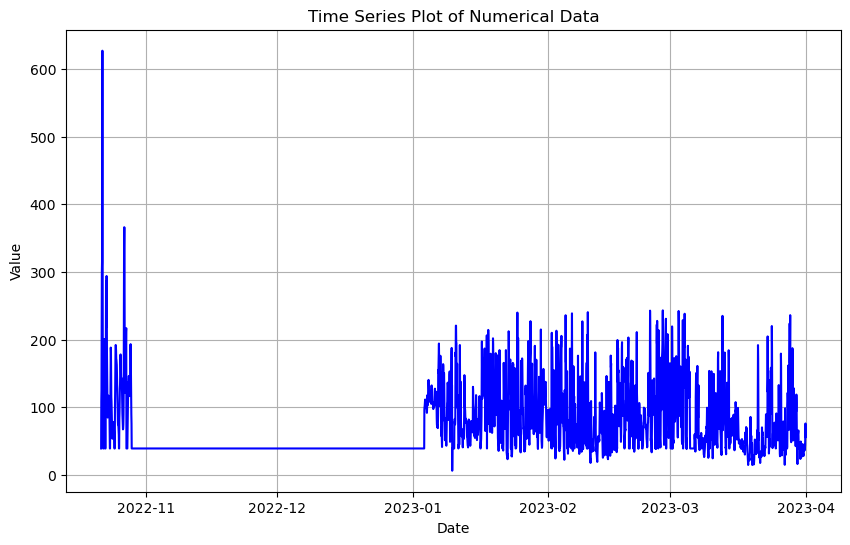

In [14]:
# Step 3: Time Series Plot
# Plot the numerical time series data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['PM10 (ug/m3)'], color='blue')
plt.title('Time Series Plot of Numerical Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [15]:
# Create output variable based on PM2.5 and PM10
def categorize_air_quality(row):
    if row['PM2.5 (ug/m3)'] <= 12 and row['PM10 (ug/m3)'] <= 54:
        return 'Good'
    elif row['PM2.5 (ug/m3)'] <= 35.4 or row['PM10 (ug/m3)'] <= 154:
        return 'Moderate'
    else:
        return 'Unhealthy'

df['Air_Quality'] = df.apply(categorize_air_quality, axis=1)

# View processed data
print(df[['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'Air_Quality']].head())

                     PM2.5 (ug/m3)  PM10 (ug/m3) Air_Quality
datetime                                                    
2022-10-21 16:00:00          18.74         39.26    Moderate
2022-10-21 17:00:00          88.75        109.48    Moderate
2022-10-21 18:00:00          85.20        125.13    Moderate
2022-10-21 19:00:00          83.77        223.75   Unhealthy
2022-10-21 20:00:00          93.79        300.12   Unhealthy


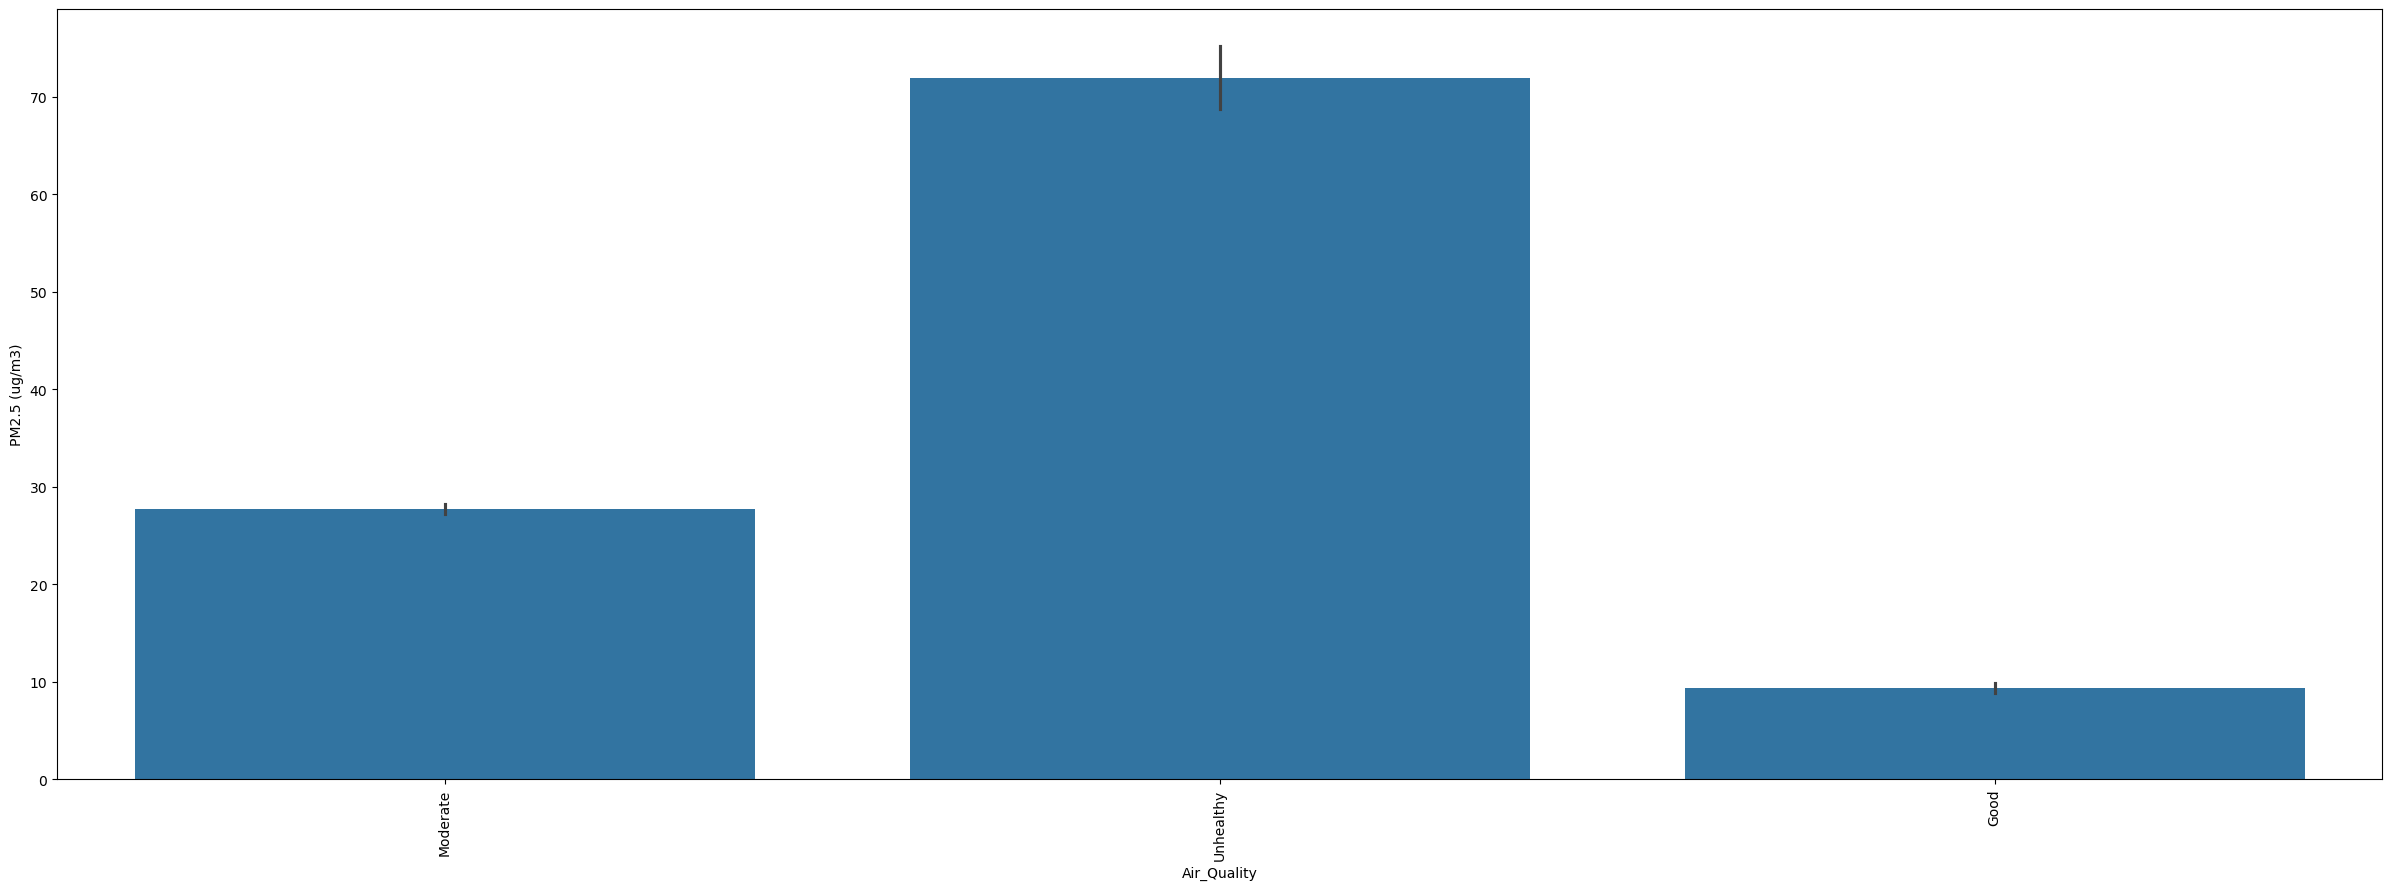

In [16]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='Air_Quality',y='PM2.5 (ug/m3)',data=df);

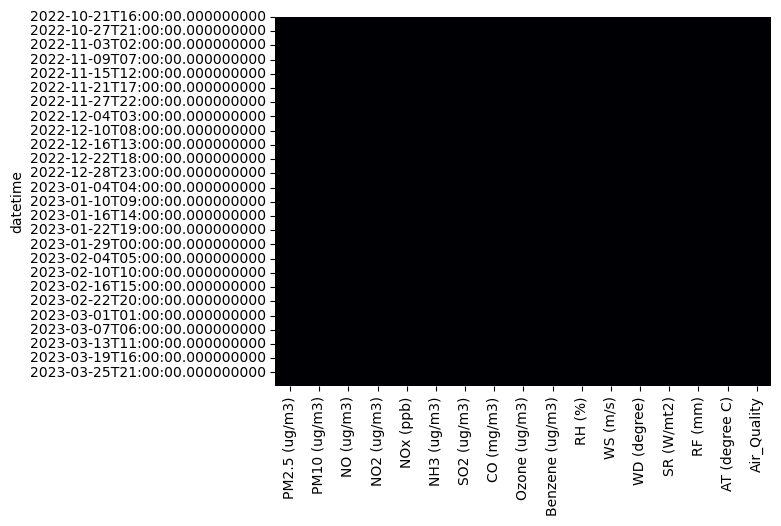

In [20]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);

In [17]:
# Separate input (X) and output (y) data
X = df[['PM10 (ug/m3)', 'AT (degree C)', 'RH (%)']]
y = df['Air_Quality']

In [18]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.metrics import classification_report

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        Good       1.00      0.19      0.32        16
    Moderate       0.99      1.00      0.99      1066
   Unhealthy       0.96      0.99      0.98        80

    accuracy                           0.99      1162
   macro avg       0.98      0.72      0.76      1162
weighted avg       0.99      0.99      0.98      1162



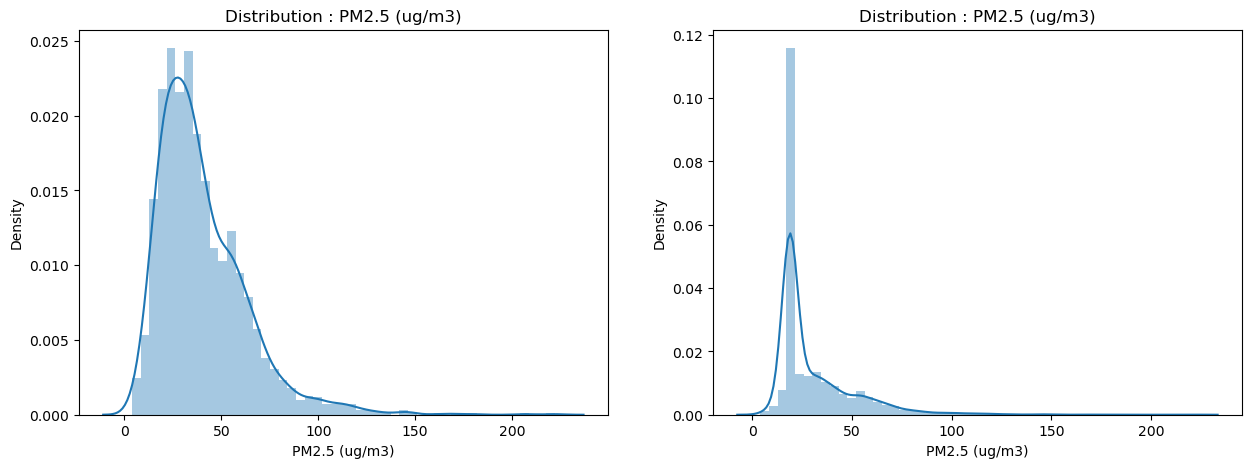

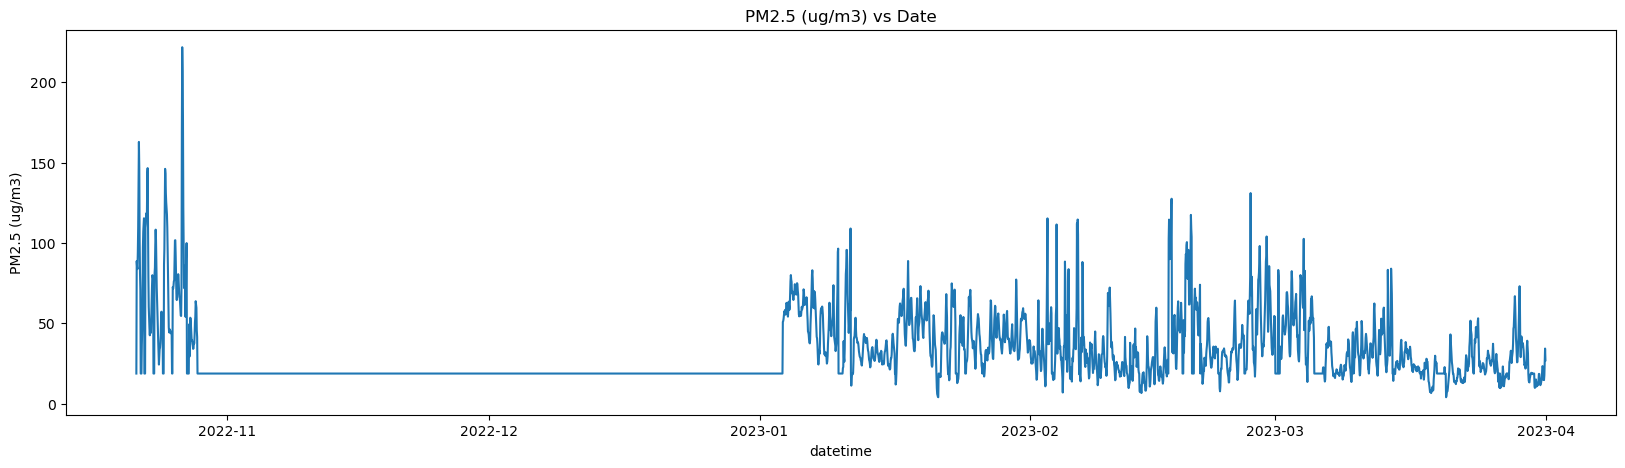

In [21]:
color1 = ['#296C92','#3EB489']
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))

plt.subplot(1,2,1)
sns.distplot(df_CG010['PM2.5 (ug/m3)']);
plt.title('Distribution : PM2.5 (ug/m3)')

plt.subplot(1,2,2)
sns.distplot(df['PM2.5 (ug/m3)']);
plt.title('Distribution : PM2.5 (ug/m3)')

fig,ax = plt.subplots(nrows = 1, ncols = 1,figsize = (20,5))
plt.subplot(1,1,1)
sns.lineplot(x = df.index ,y = 'PM2.5 (ug/m3)',data = df,palette = color1);
plt.title('PM2.5 (ug/m3) vs Date')

plt.show()
fig.tight_layout(pad = 2)

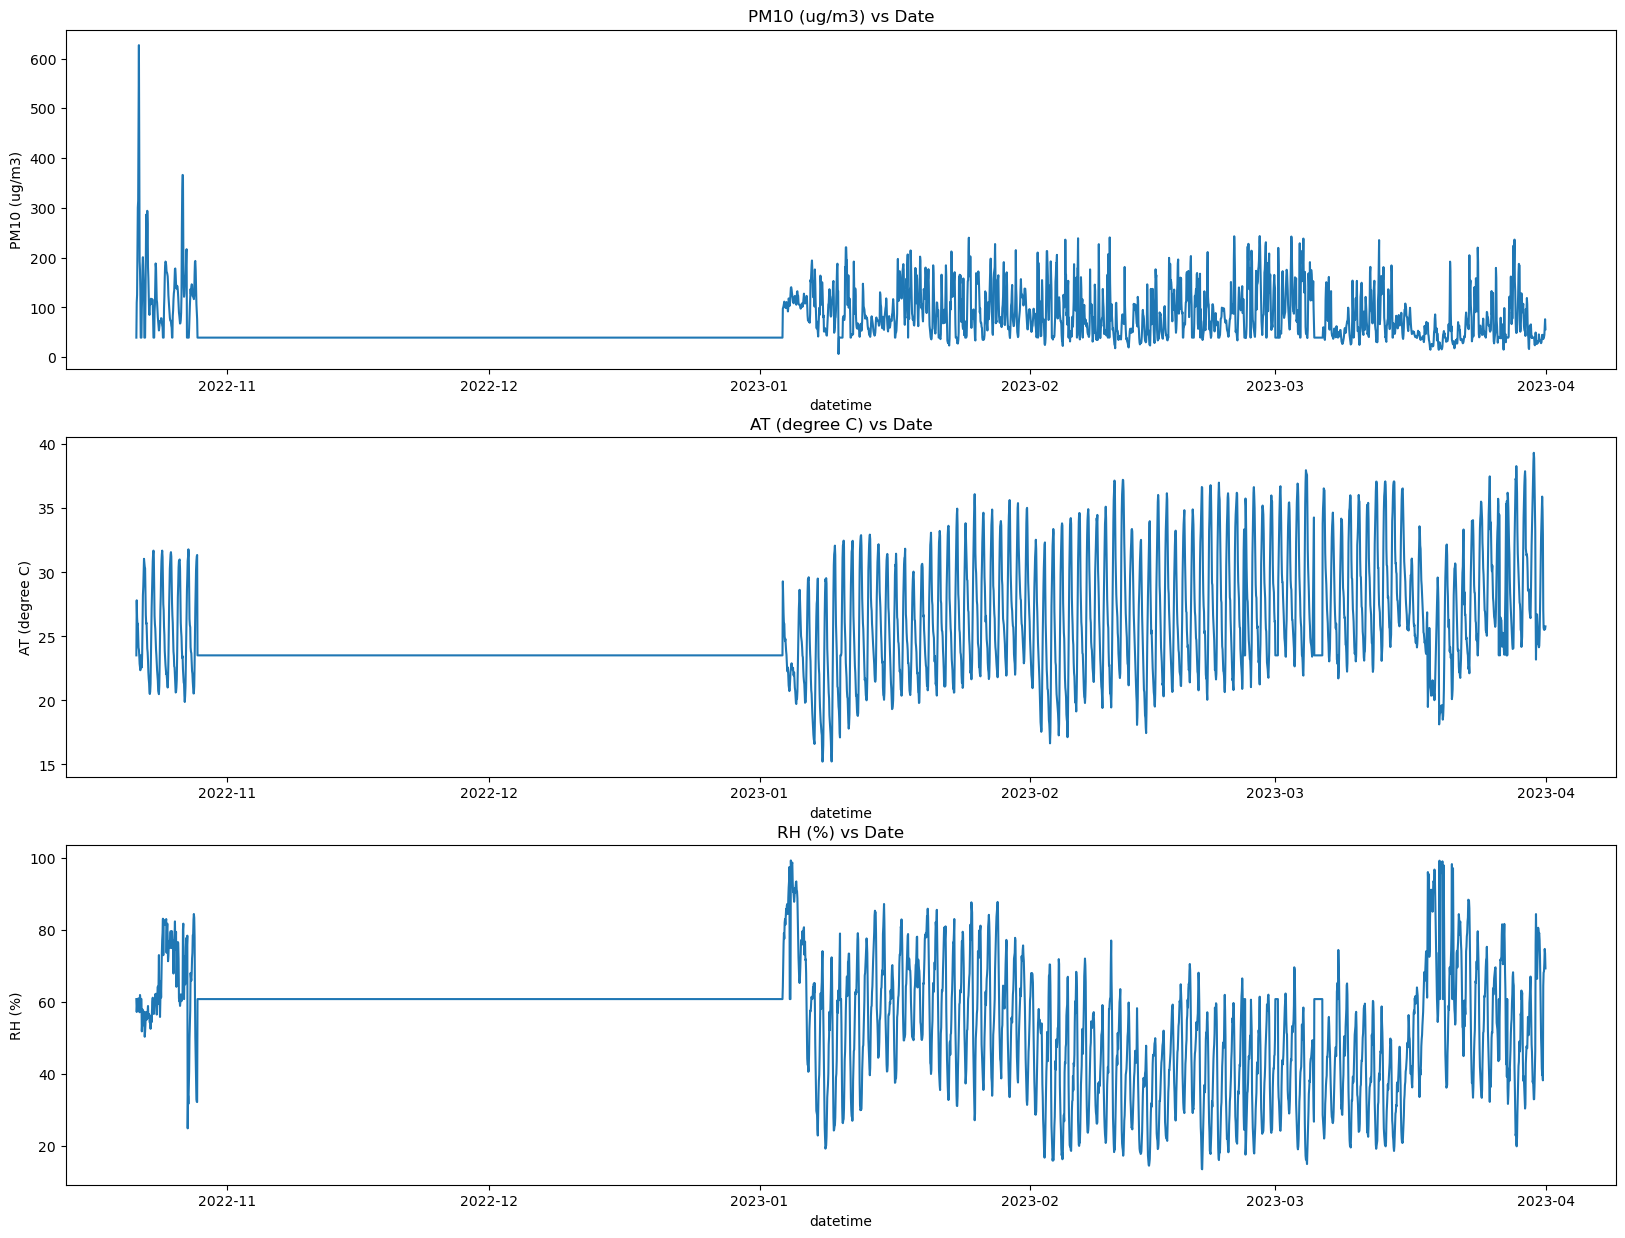

In [22]:
l1 = ['PM10 (ug/m3)', 'AT (degree C)', 'RH (%)']
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (20,15))
for i in range(len(l1)):
    
    plt.subplot(3,1,i+1)
    sns.lineplot(x = df.index,y = l1[i],data = df)
    title = l1[i] + ' vs Date'
    plt.title(title);

In [20]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window = 12).mean()
    MSTD = timeseries.rolling(window = 12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [21]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

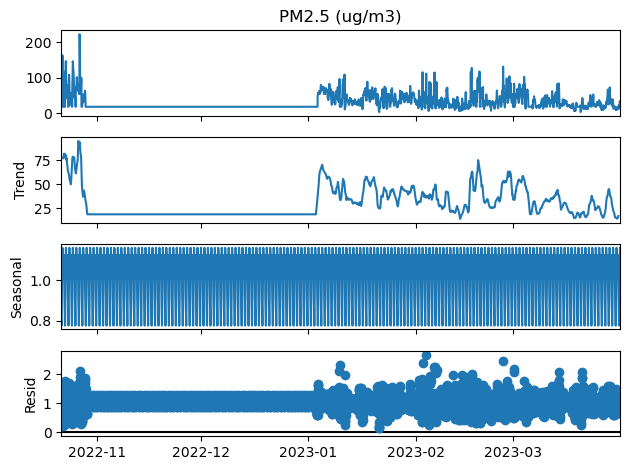

In [22]:
dec = sm.tsa.seasonal_decompose(df['PM2.5 (ug/m3)'], model = 'multiplicative').plot()
plt.show();

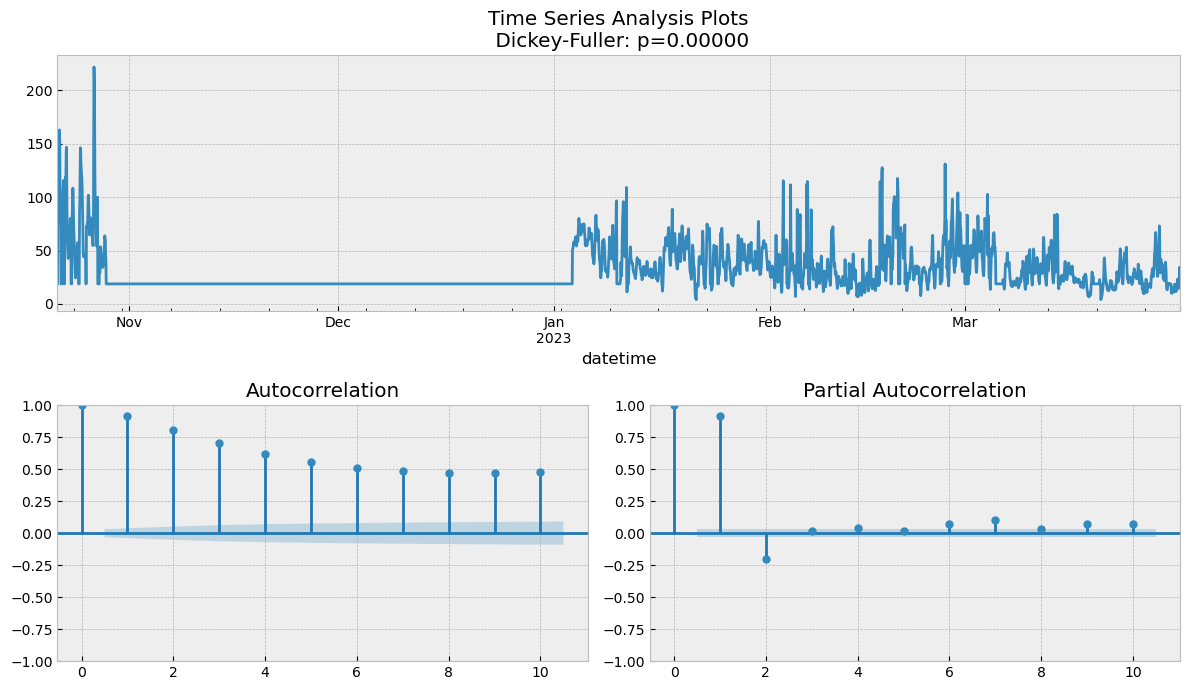

In [23]:
tsplot(df['PM2.5 (ug/m3)'],lags = 10)

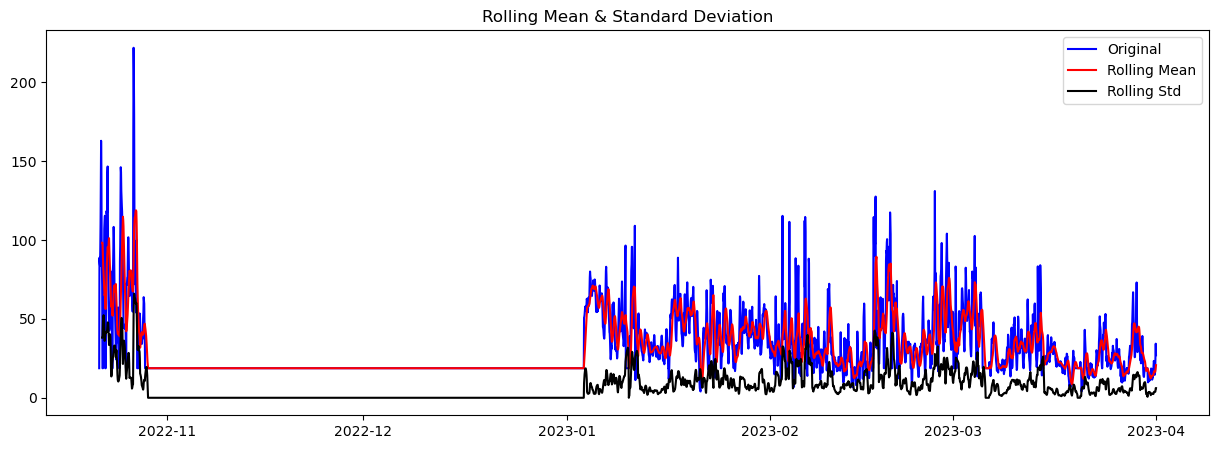

Results of Dickey-Fuller Test:
Test Statistic                  -5.59
p-value                          0.00
#Lags Used                      28.00
Number of Observations Used   3843.00
Critical Value (1%)             -3.43
Critical Value (5%)             -2.86
Critical Value (10%)            -2.57
dtype: float64


In [24]:
test_stationarity(df['PM2.5 (ug/m3)'])

In [25]:
# Fit auto SARIMA model with adjusted parameters
# stepwise=True: algorithm iteratively evaluates different combinations of parameters to find the optimal model.
# n_jobs=-1: The number of parallel jobs to run during model fitting. Setting it to -1 uses all available CPU cores for parallel processing.
model2 = auto_arima(df['PM2.5 (ug/m3)'], seasonal=True, m=12,  # Assuming hourly data with daily seasonality
                   start_p=1, d=None, start_q=1,
                   max_p=3, max_d=2, max_q=3,
                   start_P=1, D=None, start_Q=1,
                   max_P=2, max_D=1, max_Q=2,
                   trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=4.58 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=27349.543, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=27241.117, Time=1.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=27233.001, Time=1.40 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=27347.544, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=27244.242, Time=0.24 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=2.87 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=27196.698, Time=3.89 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=8.28 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=27266.969, Time=2.65 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=27195.587, Time=6.83 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=27233.796, Time=1.92 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=15.20 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=27206.227, Time=3.66 sec
 ARIMA(2,1,1)(0,0,2)[12] int

In [26]:
# Summarize the model
print(model2.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                 3872
Model:             SARIMAX(2, 1, 3)x(0, 0, [1, 2], 12)   Log Likelihood              -13414.495
Date:                                 Thu, 30 Jan 2025   AIC                          26844.989
Time:                                         19:55:59   BIC                          26895.079
Sample:                                     10-21-2022   HQIC                         26862.774
                                          - 03-31-2023                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4409      0.056     25.767      0.000       1.331       1

In [27]:
# Separate input (X) and output (y) data
X = df[['PM10 (ug/m3)', 'AT (degree C)', 'RH (%)']]
y = df['Air_Quality']

In [28]:
from sklearn.model_selection import train_test_split

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [29]:
from sklearn.preprocessing import StandardScaler

# scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training Accuracy: 0.9811808118081181
Test Accuracy: 0.9767641996557659

Classification Report:
              precision    recall  f1-score   support

        Good       0.00      0.00      0.00        16
    Moderate       0.98      1.00      0.99      1066
   Unhealthy       0.96      0.90      0.93        80

    accuracy                           0.98      1162
   macro avg       0.65      0.63      0.64      1162
weighted avg       0.96      0.98      0.97      1162



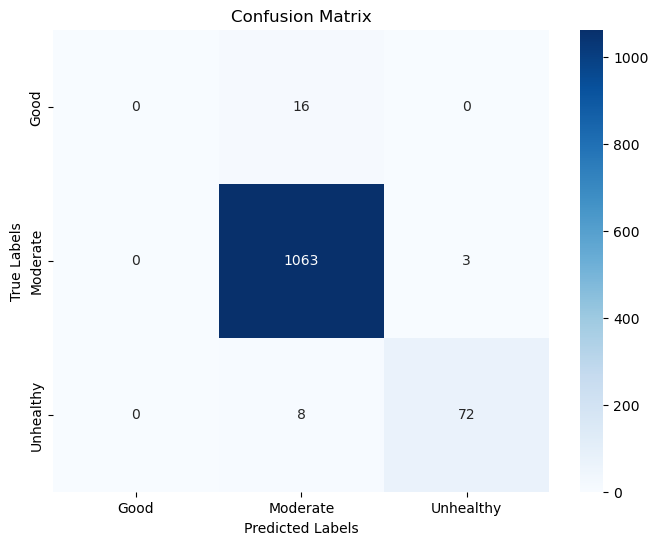

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# fitting data to model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# model predictions
y_pred = log_reg.predict(X_test)

# accuracy score
print("Training Accuracy:", accuracy_score(y_train, log_reg.predict(X_train)))

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print("Test Accuracy:", log_reg_acc)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [34]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[   0   16    0]
 [   0 1063    3]
 [   0    8   72]]


In [35]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.00      0.00      0.00        16
    Moderate       0.98      1.00      0.99      1066
   Unhealthy       0.96      0.90      0.93        80

    accuracy                           0.98      1162
   macro avg       0.65      0.63      0.64      1162
weighted avg       0.96      0.98      0.97      1162

